In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/Dataset/test/LSD/aa5.jpg
/kaggle/input/dataset/Dataset/test/LSD/a437.jpg
/kaggle/input/dataset/Dataset/test/LSD/LSD_0_6243.jpg
/kaggle/input/dataset/Dataset/test/LSD/LSD_0_7297.jpg
/kaggle/input/dataset/Dataset/test/LSD/a33.jpg
/kaggle/input/dataset/Dataset/test/LSD/a336.jpg
/kaggle/input/dataset/Dataset/test/LSD/a50.jpg
/kaggle/input/dataset/Dataset/test/LSD/a63.jpg
/kaggle/input/dataset/Dataset/test/LSD/LSD_0_3017.jpg
/kaggle/input/dataset/Dataset/test/LSD/a408.jpg
/kaggle/input/dataset/Dataset/test/LSD/a679.jpg
/kaggle/input/dataset/Dataset/test/LSD/LSD_0_8468.jpg
/kaggle/input/dataset/Dataset/test/LSD/LSD_0_7416.jpg
/kaggle/input/dataset/Dataset/test/LSD/LSD_0_5943.jpg
/kaggle/input/dataset/Dataset/test/LSD/a503.jpg
/kaggle/input/dataset/Dataset/test/LSD/LSD_0_7488.jpg
/kaggle/input/dataset/Dataset/test/LSD/LSD_0_8835.jpg
/kaggle/input/dataset/Dataset/test/LSD/LSD_0_8050.jpg
/kaggle/input/dataset/Dataset/test/LSD/a732.jpg
/kaggle/input/dataset/Dataset/test/LSD

In [4]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Step 2: Load the pre-trained VGG16 model without the top classification layers
IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS = 299, 299, 3
NUM_CLASSES = 4  # Change this to the number of classes in your dataset

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, NUM_CHANNELS))

# Step 3: Add custom classification layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# Step 4: Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Step 5: Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Step 6: Prepare your dataset
BATCH_SIZE = 32
NUM_EPOCHS = 50

train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    rescale=1. / 255,
    validation_split=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/dataset/Dataset/train',
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    '/kaggle/input/dataset/Dataset/test',
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Step 7: Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // BATCH_SIZE,
    epochs=NUM_EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // BATCH_SIZE
)


Found 15157 images belonging to 4 classes.
Found 3827 images belonging to 4 classes.
Epoch 1/50
473/473 [==============================] - 317s 659ms/step - loss: 0.4270 - accuracy: 0.8424 - val_loss: 0.2302 - val_accuracy: 0.9280
Epoch 2/50
473/473 [==============================] - 317s 671ms/step - loss: 0.1998 - accuracy: 0.9297 - val_loss: 0.1647 - val_accuracy: 0.9359
Epoch 3/50
473/473 [==============================] - 308s 650ms/step - loss: 0.1524 - accuracy: 0.9481 - val_loss: 0.2169 - val_accuracy: 0.9286
Epoch 4/50
473/473 [==============================] - 315s 666ms/step - loss: 0.1476 - accuracy: 0.9484 - val_loss: 0.1350 - val_accuracy: 0.9561
Epoch 5/50
473/473 [==============================] - 318s 672ms/step - loss: 0.1468 - accuracy: 0.9471 - val_loss: 0.1660 - val_accuracy: 0.9388
Epoch 6/50
473/473 [==============================] - 313s 661ms/step - loss: 0.1134 - accuracy: 0.9601 - val_loss: 0.1788 - val_accuracy: 0.9375
Epoch 7/50
473/473 [===================

Found 3827 images belonging to 4 classes.
3827/3827 [==============================] - 49s 12ms/step
Confusion Matrix:
[[ 691    8    0   31]
 [   0  613    2   15]
 [   1    4  958    5]
 [   4    8    9 1478]]

Classification Report:
              precision    recall  f1-score   support

         FMD       0.99      0.95      0.97       730
         IBK       0.97      0.97      0.97       630
         LSD       0.99      0.99      0.99       968
      Normal       0.97      0.99      0.98      1499

    accuracy                           0.98      3827
   macro avg       0.98      0.97      0.98      3827
weighted avg       0.98      0.98      0.98      3827



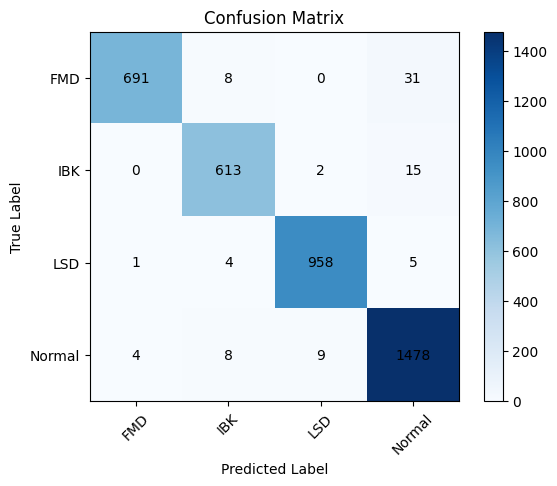

In [5]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Step 8: Evaluate the model on the test data
test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/dataset/Dataset/test',
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

# Make predictions on the test data
y_pred = model.predict(test_generator, steps=len(test_generator))

# Convert one-hot encoded predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Get the true labels
y_true_labels = test_generator.classes

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

# Calculate precision, recall, and F1 score
report = classification_report(y_true_labels, y_pred_labels, target_names=test_generator.class_indices.keys())

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(report)

def plot_confusion_matrix(confusion_matrix, labels, diagonal_color='darkblue', other_color='lightblue',text_color='black'):
    num_classes = len(labels)
    plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)

    # Highlight diagonal elements with a different color
    for i in range(num_classes):
        for j in range(num_classes):
            color = diagonal_color if i == j else other_color
            plt.text(j, i, str(confusion_matrix[i, j]), ha='center', va='center', color=text_color)

    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xticks(np.arange(num_classes), labels, rotation=45)
    plt.yticks(np.arange(num_classes), labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Example usage
class_labels = ['FMD', 'IBK', 'LSD', 'Normal']
plot_confusion_matrix(conf_matrix, class_labels, diagonal_color='darkblue', other_color='lightblue')

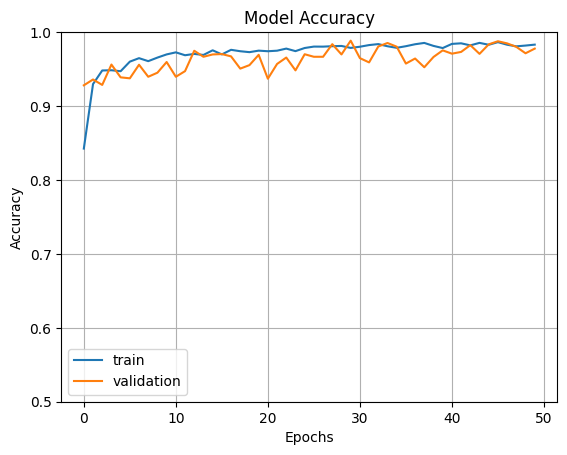

In [6]:
import matplotlib.pyplot as plt
fig1 = plt.gcf()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.axis(ymin=0.5,ymax=1)
plt.grid()
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "validation"])
plt.show()

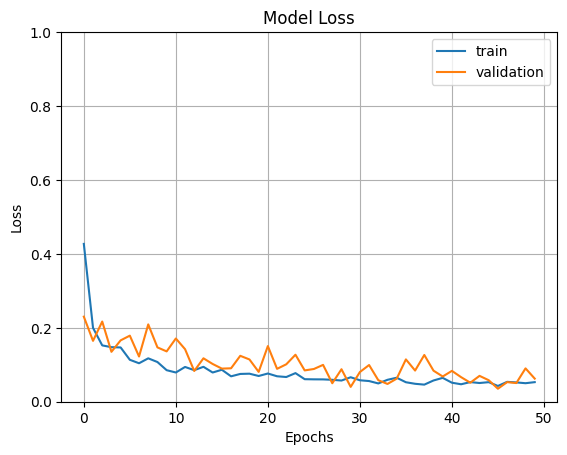

In [7]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "validation"])
plt.show()